In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Imports fashion dataset

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Gives our data a shape of 28x28

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

Tells us there are 60,000 example items

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Tells us our test group has 10,000 items, but the image stays 28x28

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [ ]:
Shows an example of one of our images

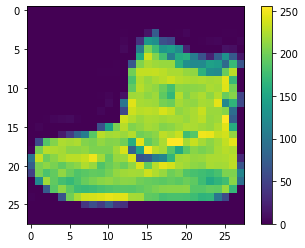

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Shows a subset of our test images

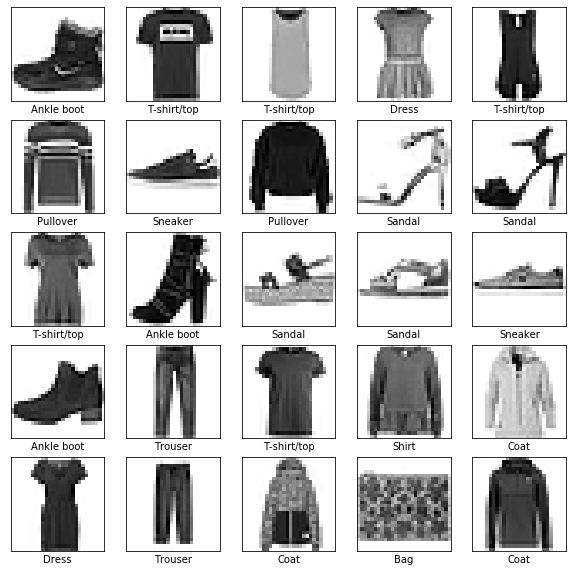

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit runs through the sample set(in this case 10 times) and returns accuracy for each round

In [19]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5002 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3728 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3376 - accuracy: 0.8761
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3135 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2969 - accuracy: 0.8900
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2797 - accuracy: 0.8968
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2690 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2589 - accuracy: 0.9029
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2476 - accuracy: 0.9078
Epoch 10/10
6

Equation to find correct accuracy percentage

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2090 - accuracy: 0.8806

Test accuracy: 0.8806


In [21]:
predictions = model.predict(test_images)

predictions[0]

array([1.1272924e-08, 4.8657739e-10, 2.0437902e-09, 3.8104998e-11,
       1.6904621e-09, 1.4436537e-03, 1.1226942e-06, 7.6864744e-03,
       4.1485272e-08, 9.9086881e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


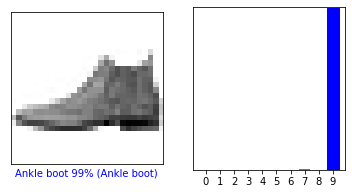

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [27]:
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.7867198e-05 2.1700807e-12 9.9337089e-01 3.3934233e-12 1.4680837e-03
  4.2135329e-10 5.1432196e-03 9.5211946e-12 4.9410462e-09 2.5145820e-13]]


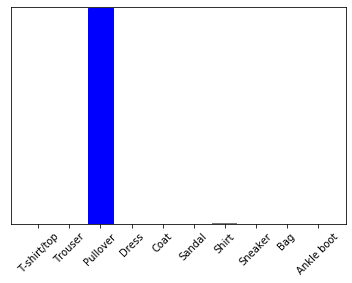

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [32]:
np.argmax(predictions_single[0])

2

Single output example of predicted classification

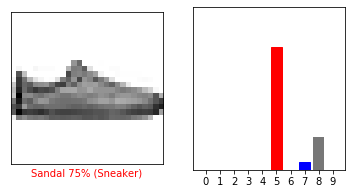

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Gives a random example set of predicted classifications

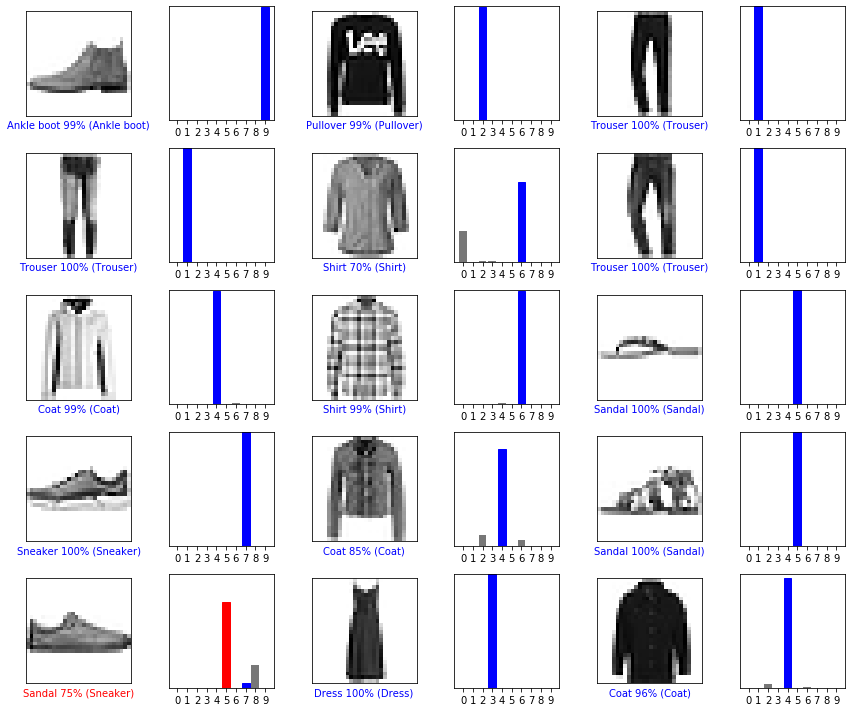

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()